In [1]:
import torch.nn as nn
import numpy as np
import torch
from PIL import Image

from src.model import SiamNet, get_siamnet
from src.model import EfficientNetB3Encoder, CLIPEncoder
from src.dataset import get_augmentations, load_config, get_coco_dataloaders, CocoDataset
from src.train import train_model

%load_ext autoreload
%autoreload 2

/home/jovyan/.mlspace/envs/genimages/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


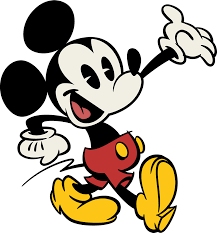

In [9]:
image = Image.open('assets/image.png').convert('RGB')
image

In [6]:
simple_transform, train_transform = get_augmentations()

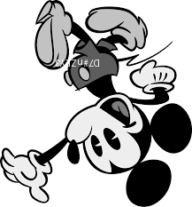

In [7]:
train_transform(image)

### model

In [46]:
encoder = EfficientNetB3Encoder(freeze=True)
preprocess = encoder.preprocess

Loaded pretrained weights for efficientnet-b3


In [47]:
tensor = preprocess(image).unsqueeze(0)
tensor.shape

torch.Size([1, 3, 224, 224])

In [48]:
encoder(tensor).shape

torch.Size([1, 1536])

In [9]:
encoder = CLIPEncoder(freeze=True)
preprocess = encoder.preprocess

In [14]:
tensor = preprocess(image).unsqueeze(0)
tensor.shape

torch.Size([1, 3, 224, 224])

In [11]:
encoder(tensor).shape

torch.Size([1, 512])

In [50]:
config = load_config('configs/train_config.yaml')

In [53]:
net = get_siamnet(config).to('cpu')

Loaded pretrained weights for efficientnet-b3


In [54]:
net(tensor, tensor)

tensor([[0.4964]], grad_fn=<ViewBackward0>)

### Data

In [ ]:
path = '/home/jovyan/nkiselev/ddorin/project/Pairwise-Image-Matching/data/coco/coco_images'

config_path = "configs/train_config.yaml"
train_config = load_config(config_path)

net = get_siamnet(train_config)
preprocessor = net.get_preprocessing()

data = CocoDataset(path, preprocessor)

Loaded pretrained weights for efficientnet-b3


In [6]:
len(data)

0

In [3]:
dataloaders = get_coco_dataloaders(path, 
                         preprocessor, 
                         batch_size=32, 
                         num_workers=4,
                         val_size=0.1, 
                         random_seed=42)

ValueError: num_samples should be a positive integer value, but got num_samples=0